<a href="https://colab.research.google.com/github/Divyadarshini08/Machine-Learning/blob/main/Minor_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install quandl

In [ ]:
import quandl

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/INTERNSHIP/1729258-1613615-Stock_Price_data_set_(1).csv')

In [ ]:
df.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
5  2018-02-12  252.139999  259.149994  249.000000  257.950012  257.950012   
6  2018-02-13  257.290009  261.410004  254.699997  258.269989  258.269989   
7  2018-02-14  260.470001  269.880005  260.329987  266.000000  266.000000   
8  2018-02-15  270.029999  280.500000  267.630005  280.269989  280.269989   
9  2018-02-16  278.730011  281.959991  275.690002  278.519989  278.519989   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
5   8534900  
6   6855200  
7  10972000  
8  10759700  
9   8312400

In [ ]:
df.tail()

Date        Open        High         Low       Close   Adj Close  \
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
1004  20047500  
1005  22542300  
1006  14346000  
1007   9905200  
1008   7782400

In [ ]:
df.shape

(1009, 7)

In [ ]:
df.index

RangeIndex(start=0, stop=1009, step=1)

In [ ]:
df.describe()

Open         High          Low        Close    Adj Close  \
count  1009.000000  1009.000000  1009.000000  1009.000000  1009.000000   
mean    419.059673   425.320703   412.374044   419.000733   419.000733   
std     108.537532   109.262960   107.555867   108.289999   108.289999   
min     233.919998   250.649994   231.229996   233.880005   233.880005   
25%     331.489990   336.299988   326.000000   331.619995   331.619995   
50%     377.769989   383.010010   370.880005   378.670013   378.670013   
75%     509.130005   515.630005   502.529999   509.079987   509.079987   
max     692.349976   700.989990   686.090027   691.690002   691.690002   

             Volume  
count  1.009000e+03  
mean   7.570685e+06  
std    5.465535e+06  
min    1.144000e+06  
25%    4.091900e+06  
50%    5.934500e+06  
75%    9.322400e+06  
max    5.890430e+07

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


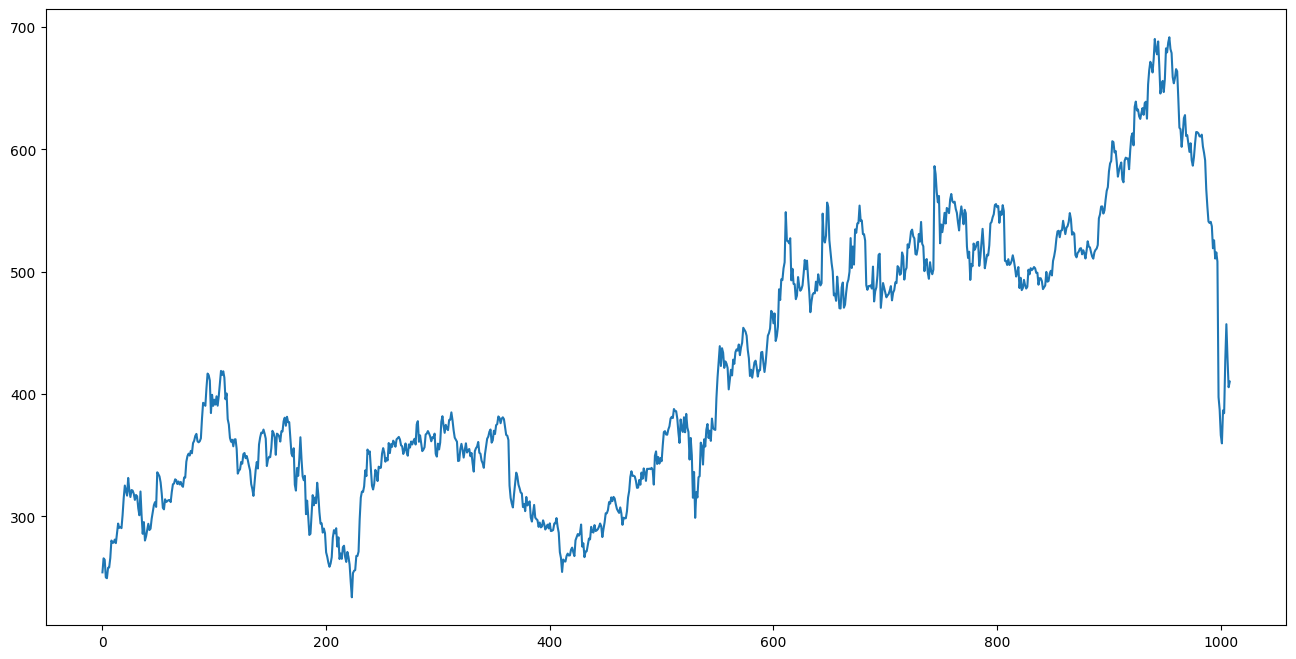

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Closing Price')

In [ ]:
df['Open - Close']=df['Open']-df['Close']
df['High - Low']=df['High']-df['Low']
df=df.dropna()

In [ ]:
X=df[['Open - Close','High - Low']]
X.head()

Open - Close  High - Low
0      7.740005   17.869995
1    -18.020004   21.700012
2      2.019989    8.120025
3     16.979981   17.619995
4      4.380005   19.690002

In [ ]:
Y=np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
Y

array([ 1, -1, -1, ..., -1,  1, -1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state = 44)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model=GridSearchCV(knn,params,cv=5)

model.fit(X_train,y_train)

accuracy_train=accuracy_score(y_train,model.predict(X_train))
accuracy_test=accuracy_score(y_test,model.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.75
Test_data Accuracy: 0.43


In [ ]:
predictions_classification=model.predict(X_test)

In [ ]:
actual_predicted_data=pd.DataFrame({'Actual Class':y_test,'Predicted Class':predictions_classification})

In [ ]:
actual_predicted_data.head(10)

Actual Class  Predicted Class
0             1               -1
1             1                1
2            -1                1
3             1               -1
4             1               -1
5            -1                1
6             1               -1
7            -1               -1
8            -1               -1
9            -1               -1

In [ ]:
y=df['Close']

In [ ]:
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [ ]:
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn import neighbors
 X_train_reg,X_test_reg,y_train_reg,y_test_reg=train_test_split(X,y,test_size=0.25,random_state=44)
params={'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg=GridSearchCV(knn_reg,params,cv=5)

model_reg.fit(X_train_reg,y_train_reg)
predictions=model_reg.predict(X_test_reg)

In [ ]:
print(predictions)

[397.6246664  378.18466587 510.465334   440.1599956  417.35733233
 375.96932993 405.3619996  336.4799988  463.25799967 358.091333
 463.44599507 412.254004   444.0613302  447.04800013 367.77533373
 354.60200187 413.0373332  342.8706624  444.3699992  449.78866387
 459.14466347 426.66199953 399.32666833 410.98866353 453.1899964
 403.10133267 412.55199987 442.6719992  477.4953338  361.86199953
 359.217334   377.49199627 365.67466433 405.51666667 407.499998
 338.37333167 400.98132933 457.19066567 356.34066373 428.8886698
 419.53600053 454.83333533 498.04665947 364.13400067 420.0513306
 427.7600026  428.92199707 351.98999633 466.9533326  347.55599767
 410.38733107 429.15466713 398.017336   404.92000133 509.136676
 436.32399913 453.034672   365.57333373 420.37866607 436.66199533
 457.34533087 465.58733927 346.98266807 344.43800253 435.74666747
 373.0373312  498.12866607 412.0466614  398.80666507 444.12732953
 417.4373332  410.3640024  365.476001   366.093335   440.8186666
 423.9006632  490.19

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))

In [ ]:
v=pd.DataFrame({'Actual Close':y_test_reg,'Predicted Close value':predictions})

In [ ]:
v.head(15)

Actual Close  Predicted Close value
390    291.440002             397.624666
414    263.079987             378.184666
724    534.450012             510.465334
19     315.000000             440.159996
496    342.880005             417.357332
687    488.929993             375.969330
376    307.630005             405.362000
132    337.489990             336.479999
677    554.090027             463.258000
68     328.529999             358.091333
212    265.140015             463.445995
183    312.869995             412.254004
850    508.820007             444.061330
616    492.989990             447.048000
236    332.940002             367.775334